<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/Using_CBOW_to_embed_Cora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using CBOW to compute Cora's node embedding
In the following tutorial we will compute Cora's node embedding using CBOW, both using the high-level pipeline and the model itself.

We start by installing the GraPE library:

```bash
pip install grape -U
```

In [1]:
!pip install -q grape -U

You should consider upgrading via the '/Users/lucacappelletti/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


## Retrieving Cora
We will now proceed to retrieve the Cora graph, using Ensmallen's automatic graph retrieval. You can learn more about the automatic graph retrieval in [add tutorial reference here].

In [2]:
from grape.datasets.linqs import Cora, get_words_data
graph, node_features = get_words_data(Cora())

### Taking a look at the graph report

In [3]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>Cora</h2><p class="paragraph">The undirected graph Cora has 2.71K heterogeneous nodes and 5.28K edges. The graph contains 78 connected components, with the largest one containing 2.48K nodes and the smallest one containing 2 nodes. The RAM requirements for the nodes and edges data structures are 207.68KB and 16.34KB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 168, the mode degree is 2, the mean degree is 3.90 and the node degree median is 3.</p><p class="paragraph">The nodes with the highest degree centrality are 35 (degree 168 and node type Genetic_Algorithms), 6213 (degree 78 and node type Reinforcement_Learning), 1365 (degree 74 and node type Neural_Networks), 3229 (degree 65 and node type Neural_Networks) and 910 (degree 44 and node type Neural_Networks).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 7 node types, which are Neural_Networks (818 nodes, 30.21%), Probabilistic_Methods (426 nodes, 15.73%), Genetic_Algorithms (418 nodes, 15.44%), Theory (351 nodes, 12.96%), Case_Based (298 nodes, 11.00%), Reinforcement_Learning (217 nodes, 8.01%) and Rule_Learning (180 nodes, 6.65%). The RAM requirement for the node types data structure is 141.72KB.</p><h3 style="margin: 1em 0 0 0;">Topological Oddities</h3><p class="paragraph">A topological oddity is a set of nodes in the graph that <i>may be derived</i> by an error during the generation of the edge list of the graph and, depending on the task, could bias the results of topology-based models. In the following paragraph, we will describe the detected topological oddities.</p><h4 style="margin: 1em 0 0 0;">Node tuples</h4><p class="paragraph">A node tuple is a connected component composed of two nodes. We have detected 57 node tuples in the graph, involving a total of 114 nodes (4.21%) and 57 edges (0.54%). The detected node tuples are:</p><ul class="medium-columns"><li><p class="paragraph">Node tuple containing the nodes 1105622 (node type Neural_Networks) and 430574 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 116512 (node type Neural_Networks) and 1107808 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 1107728 (node type Neural_Networks) and 115188 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 1136040 (node type Neural_Networks) and 754594 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 73972 (node type Case_Based) and 50980 (node type Case_Based).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 628458 (node type Neural_Networks) and 628459 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 180301 (node type Probabilistic_Methods) and 1110628 (node type Probabilistic_Methods).</p></li>
<li><p class="paragraph">Node tuple c

### Taking a look at the node features
Even though the CBOW model does not take in consideration the node features, these values are available for Cora so let's take a look.

In [4]:
node_features

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_1423,word_1424,word_1425,word_1426,word_1427,word_1428,word_1429,word_1430,word_1431,word_1432
1153728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1152858,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1114502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
362926,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Running CBOW from the default pipeline

### First-order random walk based sampling

In [5]:
from grape.embedders import CBOWEnsmallen
from plot_keras_history import plot_history

model = CBOWEnsmallen()
first_embedding = model.fit_transform(graph).get_node_embedding_from_index(0)

Let's take a look at the obtained node embedding:

In [6]:
first_embedding

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
31336,-2.216886,-2.452496,2.088527,-5.598498,3.840891,1.270952,1.418815,0.273257,-2.187444,-5.087300,...,-3.450826,-4.423616,-4.040958,-1.561565,3.924727,1.407642,-4.214134,2.795926,-1.514375,-1.506840
1061127,-0.472773,-0.151145,0.014817,0.023424,1.646417,-0.569727,-2.096500,0.084383,-2.115491,-0.909086,...,0.198158,-1.853993,-2.671958,-1.538802,0.191662,2.229441,0.875253,-0.060310,-1.209258,0.285022
1106406,-4.064950,1.356135,1.470239,-0.291987,3.945444,-2.884204,-0.902954,2.419057,-4.453228,0.002227,...,-0.158572,-3.428902,-1.343243,0.092272,0.312486,-0.644365,0.931648,1.373537,-0.614671,0.251389
13195,-1.198277,-0.277990,0.181880,0.595495,1.778698,3.750044,-2.577887,1.977023,-2.167620,-4.166145,...,0.560162,-2.642742,1.107843,2.083985,0.644208,-0.211509,-0.635992,-1.982871,-3.179565,1.814447
37879,-1.130312,-0.643412,-0.896531,-2.002439,2.316106,0.276556,-0.259282,1.792705,-2.023626,-2.732947,...,-2.249830,-0.708546,-2.002237,-0.160597,-0.717668,0.307815,-0.172089,-0.733567,-1.464673,-0.813368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,-0.890921,0.244953,3.005274,-0.888599,6.149840,-1.802696,-1.142712,4.613233,-3.532631,-2.000008,...,0.619602,1.359497,-3.396546,0.270205,3.210020,0.191415,-0.259147,-0.134860,-0.302848,0.634988
1128977,-0.070460,-0.329579,-0.983929,-1.675264,1.503413,0.525855,-1.480686,3.094578,-1.310062,-1.860141,...,-3.428729,-1.401404,-3.082221,0.789829,-0.812737,1.953338,-0.805253,-0.487031,-2.293894,1.343779
1128978,-2.466580,2.404840,-0.011564,-2.302583,7.187764,0.927577,2.925864,2.191100,-6.906654,0.656150,...,-5.479080,-3.905430,-5.009343,1.202049,-1.186020,1.031264,0.153562,-0.559941,-5.668042,0.660928
117328,-1.608535,-1.687543,0.395058,-4.829861,3.206015,2.485134,-1.067665,1.920215,-0.974610,-1.981563,...,-3.255837,-1.523527,-4.242402,-1.590889,0.327850,2.860491,-1.336126,2.084775,-2.396989,1.203387


### Second-order random walk based sampling
In some cases, one may want to use the Node2Vec sampling, which is a second-order random walk based sampling.

In [7]:
model = CBOWEnsmallen(
    return_weight=2.0,
    explore_weight=0.1
)
second_embedding = model.fit_transform(graph).get_node_embedding_from_index(0)

Let's take a look at this new embedding

In [8]:
second_embedding

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
31336,-2.696347,-2.511384,3.091722,-5.598097,1.860406,2.006136,0.772494,-2.815871e-01,-0.504038,-7.239831,...,-1.423104,-3.336160,-3.162794,-0.760384,1.899786,2.091333,-2.599062,5.310079,-1.059098,-0.550127
1061127,-0.760708,-0.556585,0.614397,0.395935,0.931154,-0.490945,-3.068071,2.133528e-01,-2.058828,-2.534220,...,0.512557,-2.166069,-3.332629,-1.453550,-1.300212,3.113935,1.560150,1.603897,-1.979707,0.992021
1106406,-4.588355,1.125287,2.052695,0.094957,2.674653,-2.585325,-0.774515,1.742769e+00,-3.348591,-2.967576,...,2.120802,-4.616165,-1.137208,0.561065,-0.973620,0.330906,1.762662,2.828062,-1.100905,1.316806
13195,-0.949841,0.451872,0.226788,1.161595,0.067870,1.822115,-2.113407,1.031812e+00,-0.595575,-3.998414,...,1.146564,-2.015033,1.125809,1.636796,0.574711,0.394930,-0.340376,-0.784678,-2.960078,1.685619
37879,-2.423236,0.461416,-0.063666,-2.124255,1.457799,1.033726,-1.149161,2.373494e+00,-1.165136,-3.982257,...,-2.266336,0.344276,-3.491775,-0.905856,-1.487869,0.605412,0.179976,-0.857099,-2.564027,0.559955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,-0.085006,-0.592908,4.191693,-1.072629,5.650469,-0.844674,-1.734431,4.240120e+00,-3.372260,-3.401505,...,0.836652,1.094207,-2.025785,-0.967444,1.180566,-0.267672,1.424396,2.394743,0.451467,1.571098
1128977,-0.846296,-0.360760,-2.409832,-0.611741,-0.098366,-0.083234,-1.946770,2.674618e+00,-0.693374,-4.406801,...,-3.927791,-1.319601,-3.394465,2.160550,-2.980939,4.268350,2.833623,1.368505,-3.333036,2.790261
1128978,-1.242061,1.991217,0.476061,-1.938277,4.030197,0.774785,1.832668,1.419240e+00,-4.804074,-1.146322,...,-4.133971,-2.576096,-3.039319,1.013951,-1.631356,1.980047,1.464259,0.865375,-4.856144,1.601197
117328,-2.668173,-2.117228,-0.564054,-6.387478,4.710461,2.089168,-1.576540,1.657410e+00,1.211683,-3.147429,...,-3.935099,-0.730117,-3.863650,-2.267071,-0.061126,5.115167,-1.237055,4.670106,-2.558161,2.374489


## Graph visualization
Let's now visualize the two node embeddings. We can use the graph visualization tool available from the Embiggen module.

In [9]:
from grape.visualizations import GraphVisualizer

We create the visualizer object.

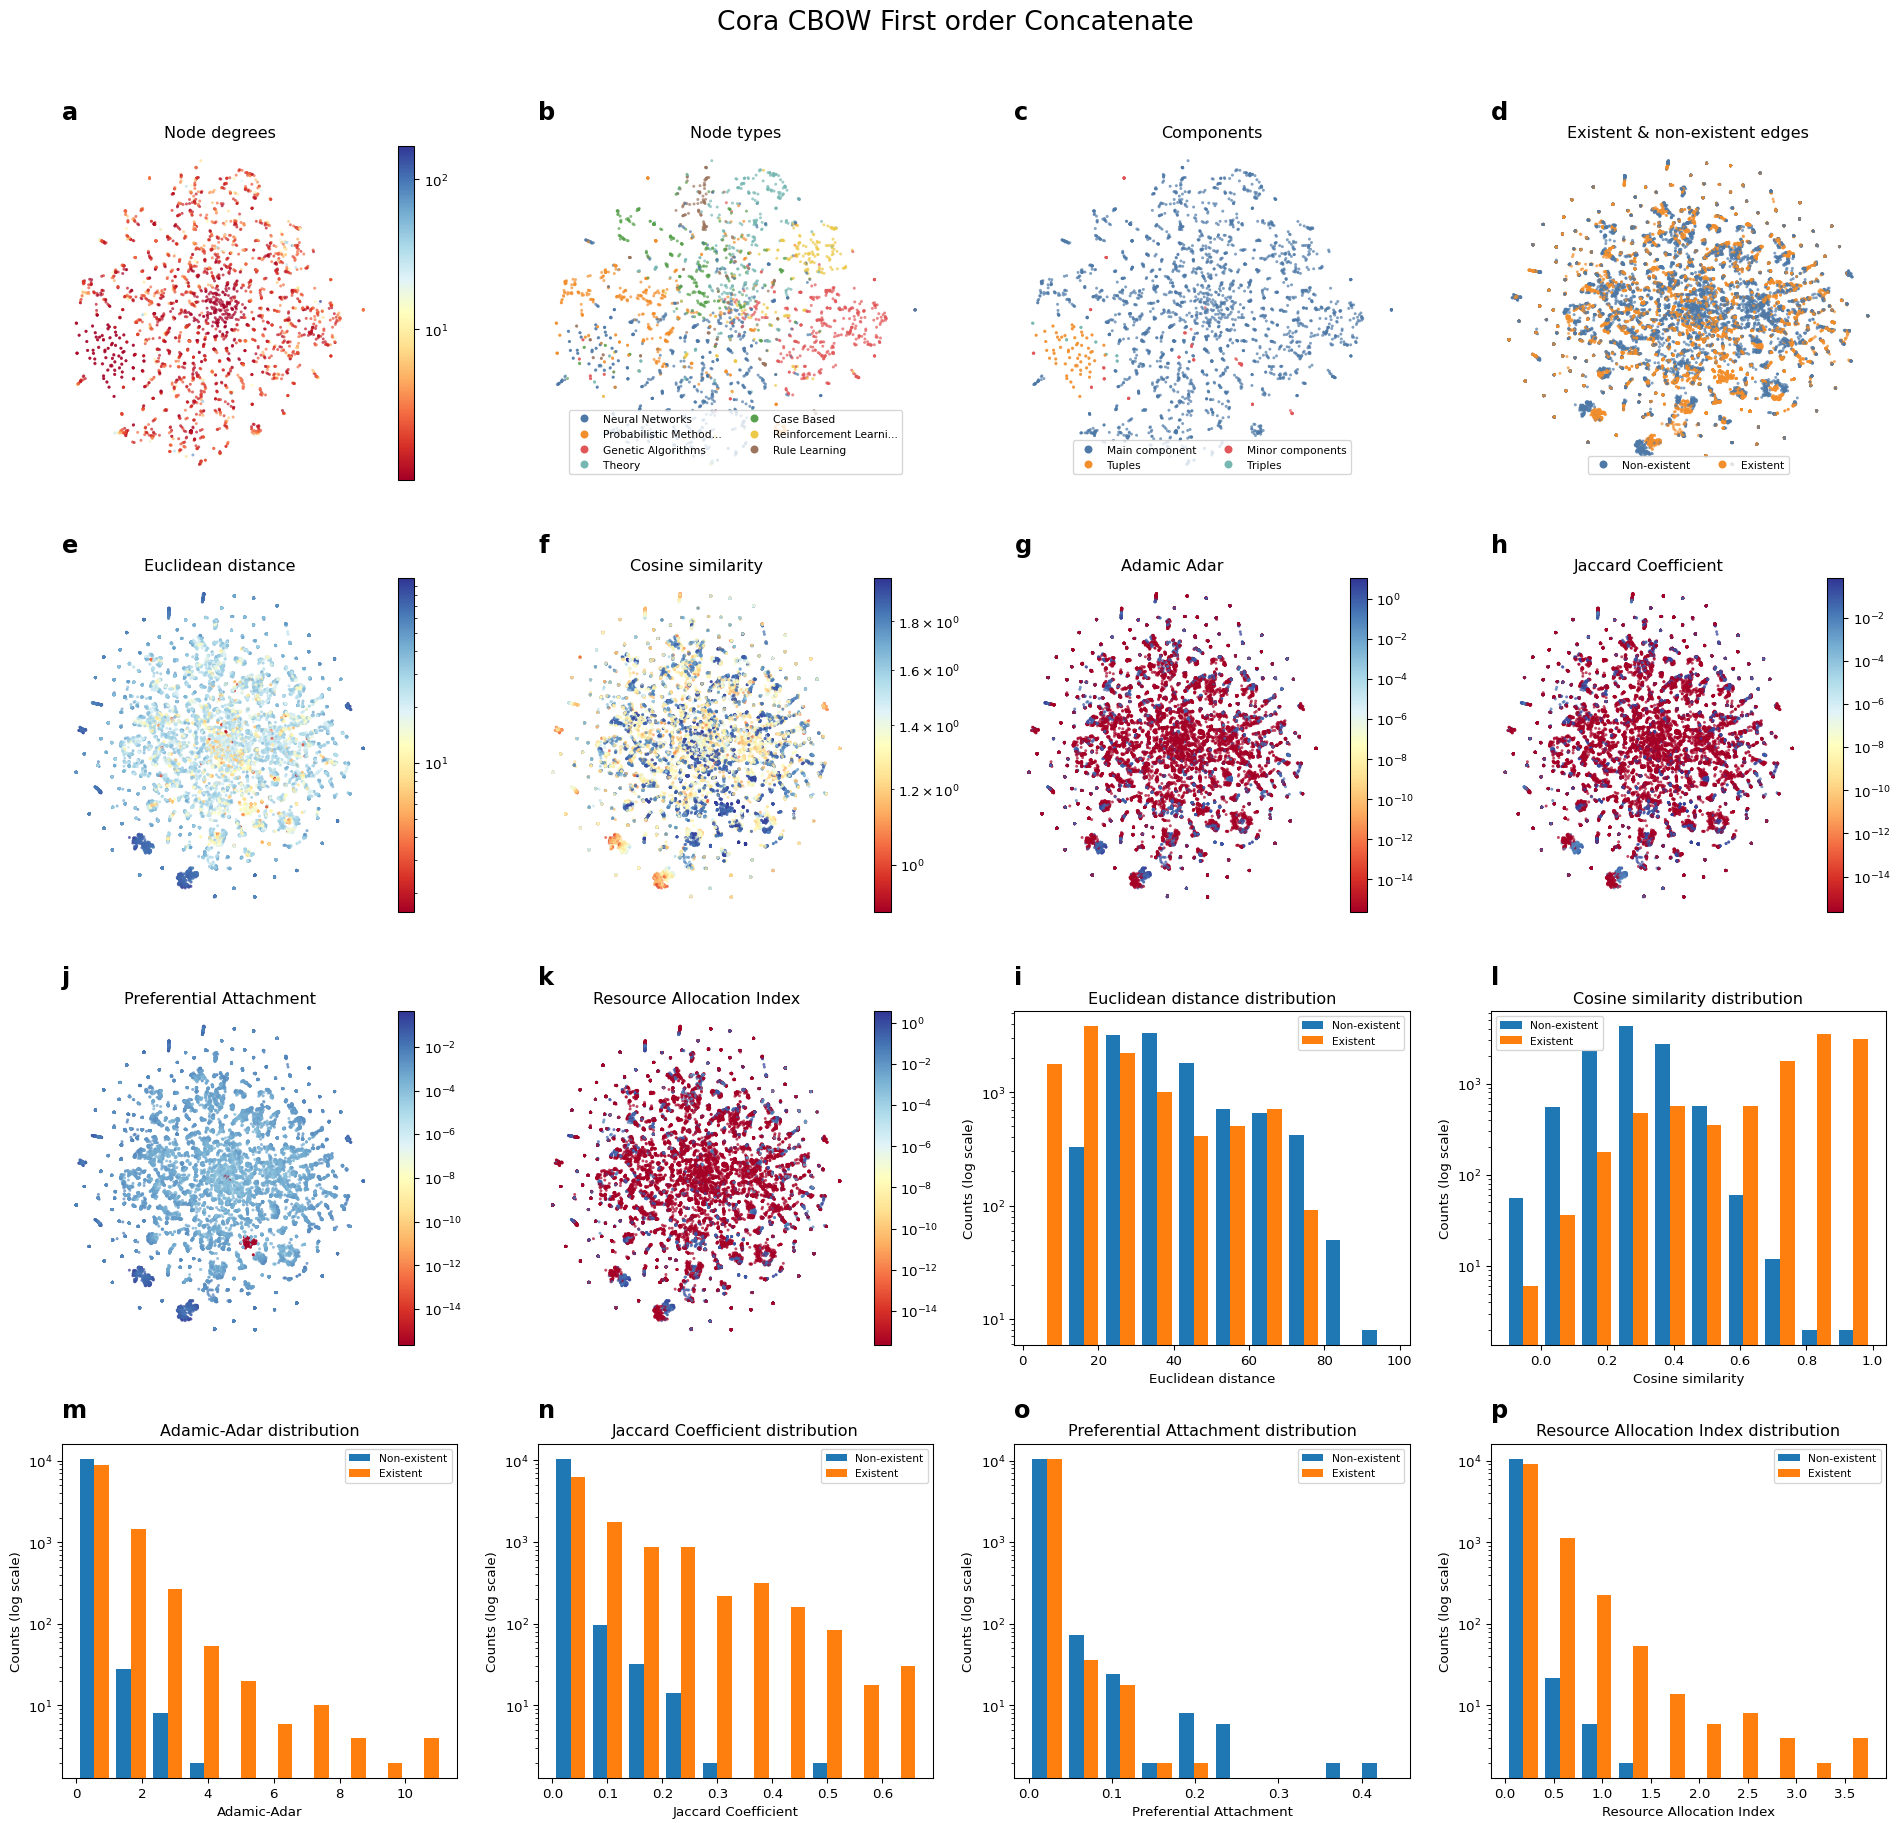

In [10]:
GraphVisualizer(
    graph,
    node_embedding_method_name="CBOW - First order"
).fit_and_plot_all(first_embedding)

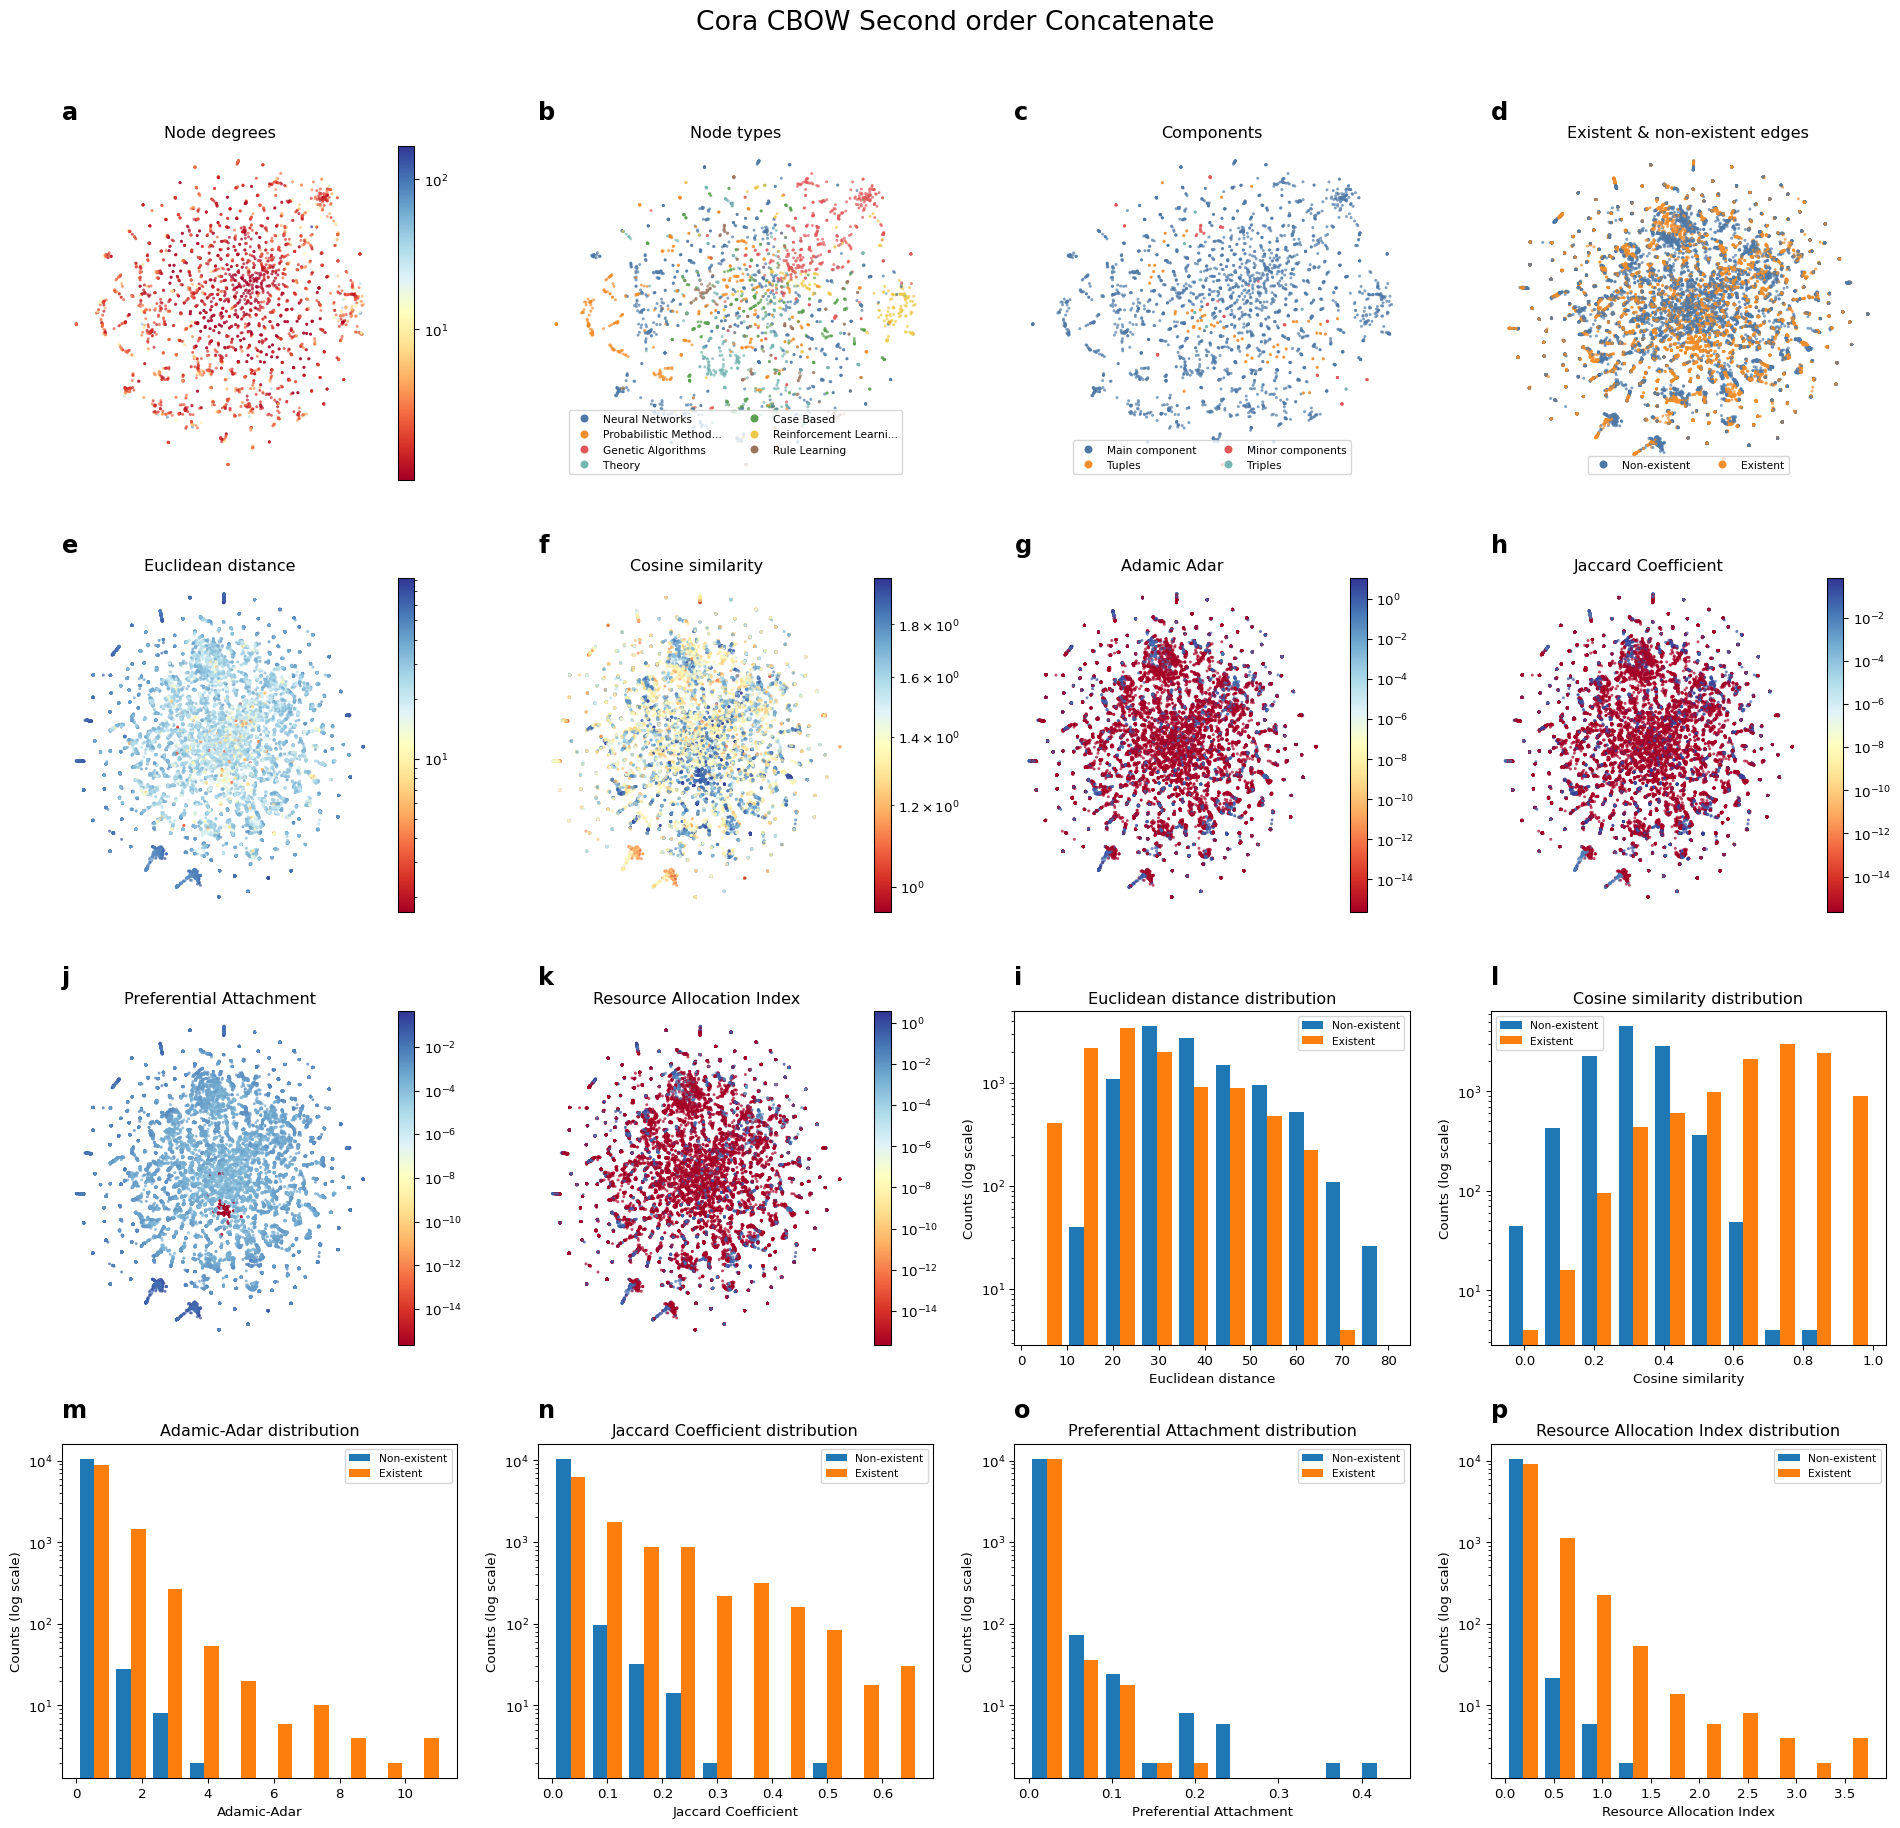

In [11]:
GraphVisualizer(
    graph,
    node_embedding_method_name="CBOW - Second order"
).fit_and_plot_all(second_embedding)